In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('mandar_gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7053.0,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61


In [8]:
# the predictive model which are going to make, it wont include the user's input for a specific society, but we will ask the 
# user that In which sector do you want to buy a house or flat?
# because the user can search for society in other websites too

# so we are dropping society temporarily and price_per_sqft is needed in output so we will drop it too

train_df = df.drop(columns=['society','price_per_sqft'])

In [15]:
# we will use this train_df for training our model

train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 78,0.75,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0
1,flat,sector 60,2.15,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,sector 90,1.23,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,sector 2,5.00,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0
4,flat,sector 63,7.52,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61


<Axes: >

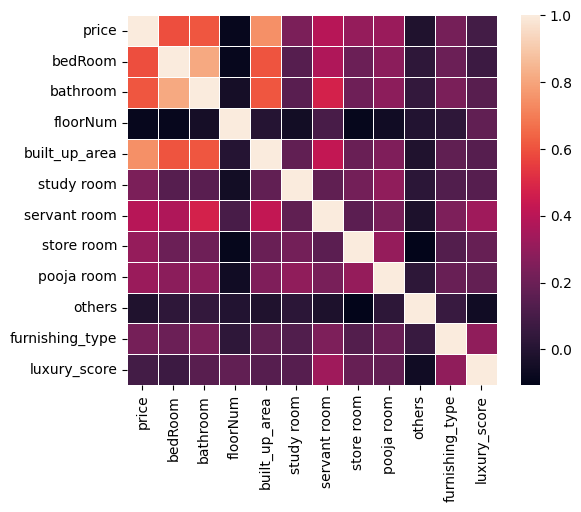

In [16]:
# sns.heatmap(train_df.corr())
numeric_train_df = train_df.select_dtypes(include=[np.number])

corr_matrix = numeric_train_df.corr()

sns.heatmap(
    corr_matrix,
    # annot=True,       # This will write the data value in each cell
    # cmap='coolwarm',  # Choose a color scheme for the heatmap
    fmt=".2f",        # Format the annotations to 2 decimal places
    linewidths=.5,    # Adds space between cells
    square=True       # Forces the aspect ratio of the blocks to be square
)


In [18]:
corr_matrix['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225755
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [19]:
# cols in question

# numerical -> luxury_score, others, floorNum  --> they have less correlation with price
# categorical -> property_type, sector, agePossession